# **Global Needs**

In [ ]:
import torch

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# **Data Preprocessing**

Dependencies and Data Preparation

In [ ]:
# Depedencies
!pip install Sastrawi

import pandas as pd
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 15.0 MB/s eta 0:00:00


In [ ]:
# Variable for datasets
paslon = 'paslon.csv'
data = pd.read_csv(paslon, delimiter=",", encoding='ISO-8859-1')
print(data.head())

                                               tweet     label
0  gemira dan semeton muslim bali deklarasi dukun...  Positive
1    fahnoor inismyname makanya kita dukung presiden  Negative
2  jokowi kali ini jatahnya bg kerutan di wajah a...  Positive
3  selamat hut kopassus ke semoga semangat patrio...  Positive
4  partai gerindra badung menggelar rapat konsoli...  Negative


Preprocessing

In [ ]:
# Drop unnecessary columns
columns_to_keep = ['tweet', 'label']
data = data[[col for col in columns_to_keep if col in data.columns]]

print(data.head())

                                               tweet     label
0  gemira dan semeton muslim bali deklarasi dukun...  Positive
1    fahnoor inismyname makanya kita dukung presiden  Negative
2  jokowi kali ini jatahnya bg kerutan di wajah a...  Positive
3  selamat hut kopassus ke semoga semangat patrio...  Positive
4  partai gerindra badung menggelar rapat konsoli...  Negative


In [ ]:
# Cleaning function
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text


# Apply cleaning
data['tweet_cleaned'] = data['tweet'].apply(clean_text)

# Case folding
data['tweet_cleaned'] = data['tweet_cleaned'].str.lower()

# Stopword removal
stopword_factory = StopWordRemoverFactory()
stopword_remover = stopword_factory.create_stop_word_remover()
data['tweet_cleaned'] = data['tweet_cleaned'].apply(stopword_remover.remove)

# Stemming
stemmer_factory = StemmerFactory()
stemmer = stemmer_factory.create_stemmer()
data['tweet_cleaned'] = data['tweet_cleaned'].apply(stemmer.stem)

# Map labels (Positive = 0, Negative = 1)
data['label'] = data['label'].map({'Positive': 0, 'Negative': 1})

# Result
print(data.head())

                                               tweet  label  \
0  gemira dan semeton muslim bali deklarasi dukun...      0   
1    fahnoor inismyname makanya kita dukung presiden      1   
2  jokowi kali ini jatahnya bg kerutan di wajah a...      0   
3  selamat hut kopassus ke semoga semangat patrio...      0   
4  partai gerindra badung menggelar rapat konsoli...      1   

                                       tweet_cleaned  
0  gemira semeton muslim bal deklarasi dukung pra...  
1         fahnoor inismyname makanya dukung presiden  
2  jokowi kali jatah bg kerut wajah amp rambut pu...  
3  selamat hut kopassus moga semangat patriotisme...  
4  partai gerindra badung gelar rapat konsolidasi...  


In [ ]:
# Variable for preprocessed datasets
preprocessed_paslon = 'preprocessed_paslon.csv'

In [ ]:
# Save preprocessed data
# Replace 'tweet' column with the cleaned version
data['tweet'] = data['tweet_cleaned']
# Keep only the final 'tweet' and 'label' columns
data = data[['tweet', 'label']]
data.to_csv(preprocessed_paslon, index=False)

# **Data Exploration**

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Load dataset
preprocessed_paslon = "preprocessed_paslon.csv"
data = pd.read_csv(preprocessed_paslon, delimiter = ",", encoding='ISO-8859-1')

print(data.head())

                                               tweet  label
0  batin komen lawak pasti suruh ma atas kalo ga ...    1.0
1  contoh buzzer goblok kasih bukti data fakta vi...    1.0
2  pak anies asal beda perintah entah benar salah...    1.0
3  pak munafik anies ngakunya resah soal orang or...    1.0
4  desak hrs tentang tum coba lihat rekam jejak g...    1.0


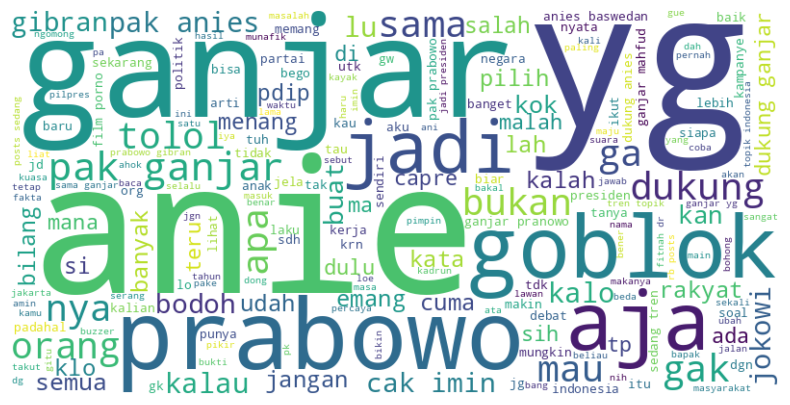

In [ ]:
# merging all tweets for vizualitation
data['tweet'] = data['tweet'].astype(str)
all_text = ' '.join(data['tweet'])

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

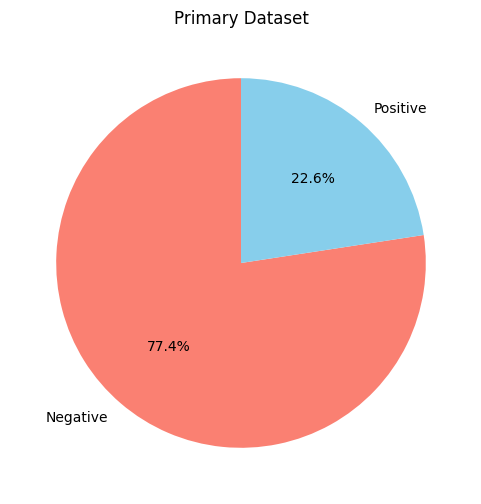

In [ ]:
# Calculating class distribution
class_counts = data['label'].value_counts()  # Menghitung jumlah setiap kelas

# Label Mapping from numerical to string
class_labels = ['Negative', 'Positive']  # 0 = Positive, 1 = Negative

# Pie Chart Visual
plt.figure(figsize=(6, 6))
plt.pie(
    class_counts,
    labels=class_labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=['salmon', 'skyblue']
)
plt.title("Primary Dataset")
plt.show()